In [1]:
FILE_PATH = r"..\dataset\survey_results.csv"

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy

import matplotlib.pyplot as plt

fig_export_path = r"..\papers\report\ync-latex-capstone-master\figures"

In [3]:
df_results = pd.read_csv(FILE_PATH)
df_results.head()

,Timestamp,"If you are a NUS / Yale-NUS student, are you 18 years old and above? \n\nOR \n\nIf you are not a NUS student, are you above 21+ years old?","I have read about the purpose of this research study, agree to participate, and understand that I can withdraw at any time.",What is your major / prospective major?,What is your age?,Do you have any experience with AI / data science / programming?,Do you have any experience with regarding data privacy / law?,Are you concerned about your data privacy?,How would you rate your capability in protecting your online data?,Do you think decisions that are made by AI can be useful to society?,...,Think that using the model is a method that could be a risk to society?.3,Trust the prediction made by the model?.3,Think that using the model is an effective method of identifying violations of the PDPA?.4,Think that using the model is a fair method of identifying violations of the PDPA?.4,Think that using the model is a method that could be a risk to society?.4,Trust the prediction made by the model?.4,Think that using the model is an effective method of identifying violations of the PDPA?.5,Think that using the model is a fair method of identifying violations of the PDPA?.5,Think that using the model is a method that could be a risk to society?.5,Trust the prediction made by the model?.5
0,2023/01/30 4:34:41 PM GMT+8,Yes,Yes,Environmental Studies,NaN,3,1,2,2,4,...,2,2,2,2,2,2,2,2,3,2
1,2023/01/30 5:02:57 PM GMT+8,Yes,Yes,Global Affairs / Political Science,NaN,2,3,2,1,5,...,2,1,2,2,2,1,4,3,2,4
2,2023/01/30 5:14:27 PM GMT+8,Yes,Yes,Economics,NaN,3,3,4,2,5,...,2,3,1,1,1,1,1,1,1,1
3,2023/01/30 6:05:25 PM GMT+8,Yes,Yes,Law,NaN,1,4,4,4,3,...,2,3,2,2,1,2,3,2,2,4
4,2023/01/30 6:06:22 PM GMT+8,Yes,Yes,Law,NaN,1,1,3,3,5,...,3,3,1,1,2,3,2,2,3,3


In [4]:
# Create unique IDs for each respondent
df_results["id"] = [n for n in range(len(df_results))]

# Create category for law or non-law
df_results["Law_nonlaw"] = df_results["What is your major / prospective major?"].apply(lambda s: "non-law" if s != "Law" else "law")

In [5]:
df_results["What is your age?"].unique()

array([nan, '18 - 25', '26 - 35'], dtype=object)

In [6]:
# Replace NAs for ages
df_results["What is your age?"] = df_results["What is your age?"].fillna('18 - 25')

#### Segment the columns according to the parts in the survey

Choosing the col indexes of the dataframe corresponding to the parts of the survey

### Demographic data

In [7]:
print(df_results.columns[3:12])

Index(['What is your major / prospective major?', 'What is your age?',
       'Do you have any experience with AI / data science / programming?',
       'Do you have any experience with regarding data privacy / law?',
       'Are you concerned about your data privacy?',
       'How would you rate your capability in protecting your online data?',
       'Do you think decisions that are made by AI can be useful to society?',
       'Do you think decisions made by AI are fair?',
       'Do you think decisions made by AI can be a risk to society?'],
      dtype='object')


### Part 2: three contexts initial survey

In [8]:
print(df_results.columns[13:25])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?',
       'Think that using the model is a fair method of identifying violations of the PDPA?',
       'Think that using the model is a method that could be a risk to society?',
       'Trust the prediction made by the model?',
       'Think that using the model is an effective method of identifying violations of the PDPA?.1',
       'Think that using the model is a fair method of identifying violations of the PDPA?.1',
       'Think that using the model is a method that could be a risk to society?.1',
       'Trust the prediction made by the model?.1',
       'Think that using the model is an effective method of identifying violations of the PDPA?.2',
       'Think that using the model is a fair method of identifying violations of the PDPA?.2',
       'Think that using the model is a method that could be a risk to society?.2',
       'Trust the prediction made by the model?.2'],
      dtype

### Part 3: Assessing understandability of log + tfidf

In [9]:
print(df_results.columns[25:40])

Index(['Do you understand why the model made the prediction?',
       'Why do you think the model made this prediction? ',
       'Did you find the visualisation easy to interpret?',
       'Do you understand why the model made the prediction?.1',
       'Why do you think the model made this prediction? .1',
       'Did you find the visualisation easy to interpret?.1',
       'Based on your current understanding, do you think that the sentence below would be predicted to be "Identifier_Cookie_or_Similar_Tech_1stParty"?\n\n"We also use tracking technologies to keep records, store your preferences, improve our advertising, and collect Non-Identifying Information, including Device Data and information about your interaction with the Site and our Business Partners' web sites."',
       'Do you understand why the model made the prediction?.2',
       'Why do you think the model made this prediction?',
       'Did you find the visualisation easy to interpret?.2',
       'Based on your curren

### Part 4: Comparing between log + glove vs svc + glove

In [10]:
print(df_results.columns[40:43])

Index(['Which explanation did you find easier to interpret?',
       'Which explanation did you find easier to interpret?.1',
       'Which explanation did you find easier to interpret?.2'],
      dtype='object')


### Part 4: Comparing between svc + tfidf vs svc + glove

In [11]:
print(df_results.columns[43:46])

Index(['Which explanation did you find easier to interpret?.3',
       'Which explanation did you find easier to interpret?.4',
       'Which explanation did you find easier to interpret?.5'],
      dtype='object')


### Part 5: Re assessing the same 3 contexts

In [12]:
print(df_results.columns[46: -1])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?.3',
       'Think that using the model is a fair method of identifying violations of the PDPA?.3',
       'Think that using the model is a method that could be a risk to society?.3',
       'Trust the prediction made by the model?.3',
       'Think that using the model is an effective method of identifying violations of the PDPA?.4',
       'Think that using the model is a fair method of identifying violations of the PDPA?.4',
       'Think that using the model is a method that could be a risk to society?.4',
       'Trust the prediction made by the model?.4',
       'Think that using the model is an effective method of identifying violations of the PDPA?.5',
       'Think that using the model is a fair method of identifying violations of the PDPA?.5',
       'Think that using the model is a method that could be a risk to society?.5',
       'Trust the prediction made by the model?.5', 'id'

#### Visualisation of demographics

In [13]:
sns.set_theme(style = "whitegrid")

<AxesSubplot:xlabel='count', ylabel='What is your major / prospective major?'>

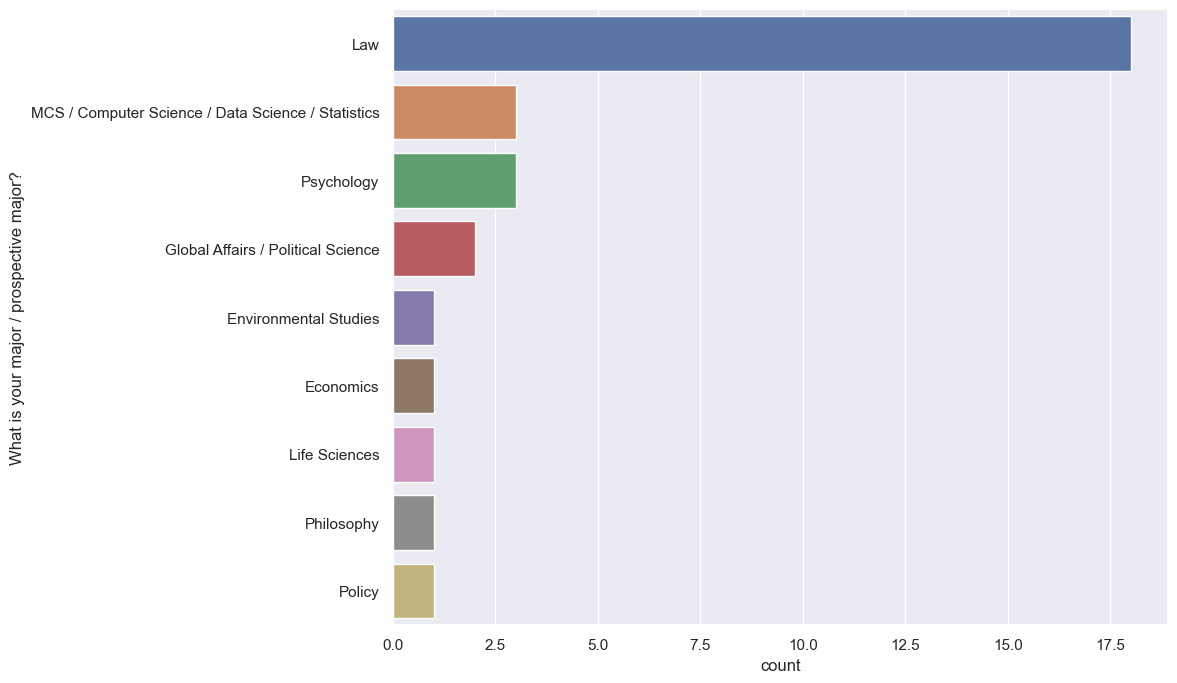

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(y = "What is your major / prospective major?", data = df_results, orient = "h", order = df_results["What is your major / prospective major?"].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Law_nonlaw'>

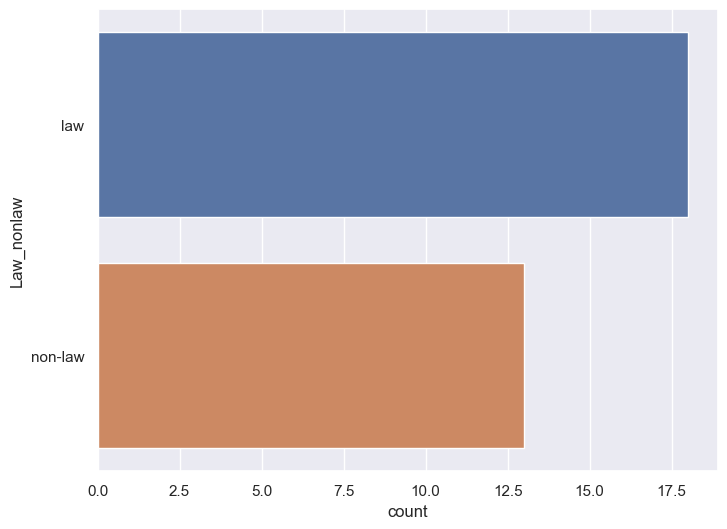

In [15]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(y = "Law_nonlaw", data = df_results, orient = "h", order = df_results["Law_nonlaw"].value_counts().index)

In [16]:
print(df_results.columns[5:12])

Index(['Do you have any experience with AI / data science / programming?',
       'Do you have any experience with regarding data privacy / law?',
       'Are you concerned about your data privacy?',
       'How would you rate your capability in protecting your online data?',
       'Do you think decisions that are made by AI can be useful to society?',
       'Do you think decisions made by AI are fair?',
       'Do you think decisions made by AI can be a risk to society?'],
      dtype='object')


#### Demographic split by law / non-law

In [17]:
feature_names_demographic = ["Experience with AI", "Experience with data privacy / law", "Concerned about data privacy", "Capability in protecting personal data", "Decisions by AI are useful", "Decisions by AI are fair", "Decisions by AI can be a risk"]

mean_demographic_nonlaw = []

for col in df_results.columns[5:12] :
    mean_demographic_nonlaw.append(df_results[col][df_results["Law_nonlaw"] == "non-law"].mean())

In [18]:
mean_demographic_law = []

for col in df_results.columns[5:12] :
    mean_demographic_law.append(df_results[col][df_results["Law_nonlaw"] == "law"].mean())

In [23]:
def plot_2_radar_charts(data1, data2, data1_name, data2_name, feature_names, y_lim, title = None, export = False, filename = None):
    """
    data1, data2: 1d array of data
    data1_name, data2_name: string
    feature_names: list of strings
    y_lim: [1, 5]
    title: String
    export: Bool
    filename: filepath+desired_filename
    """

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=data1,
        theta=feature_names,
        fill='toself',
        name=data1_name
    ))
    fig.add_trace(go.Scatterpolar(
        r=data2,
        theta=feature_names,
        fill='toself',
        name= data2_name
    ))

    fig.update_layout(
        title = title,
        width = 1000, 
        height = 500,
        polar=dict(
        radialaxis=dict(
        visible=True,
        range=y_lim
        )),
    showlegend=True
    )
                
    fig.show()

    if export :
        fig.write_image(filename, scale = 3)

In [ ]:
fig_export_path+r"\fig1.png"

'papers\\report\\ync-latex-capstone-master\\figures\\fig1.png'

In [24]:
plot_2_radar_charts(mean_demographic_law, mean_demographic_nonlaw, "Law", "Non-law", feature_names_demographic, [0, 5], title = "Self-reported beliefs regarding AI & Data Privacy of Law and Non-Law respondents <br> (n = 31, on a scale from 1 to 5, with 1 representing 'least agree' and 5 representing 'most agree')")

#### Comparing scores of the contexts before and after looking at the explanations

In [25]:
# Cols from initial questioning
print(df_results.columns[13:25])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?',
       'Think that using the model is a fair method of identifying violations of the PDPA?',
       'Think that using the model is a method that could be a risk to society?',
       'Trust the prediction made by the model?',
       'Think that using the model is an effective method of identifying violations of the PDPA?.1',
       'Think that using the model is a fair method of identifying violations of the PDPA?.1',
       'Think that using the model is a method that could be a risk to society?.1',
       'Trust the prediction made by the model?.1',
       'Think that using the model is an effective method of identifying violations of the PDPA?.2',
       'Think that using the model is a fair method of identifying violations of the PDPA?.2',
       'Think that using the model is a method that could be a risk to society?.2',
       'Trust the prediction made by the model?.2'],
      dtype

In [26]:
# Cols from last questioning
print(df_results.columns[46: -1])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?.3',
       'Think that using the model is a fair method of identifying violations of the PDPA?.3',
       'Think that using the model is a method that could be a risk to society?.3',
       'Trust the prediction made by the model?.3',
       'Think that using the model is an effective method of identifying violations of the PDPA?.4',
       'Think that using the model is a fair method of identifying violations of the PDPA?.4',
       'Think that using the model is a method that could be a risk to society?.4',
       'Trust the prediction made by the model?.4',
       'Think that using the model is an effective method of identifying violations of the PDPA?.5',
       'Think that using the model is a fair method of identifying violations of the PDPA?.5',
       'Think that using the model is a method that could be a risk to society?.5',
       'Trust the prediction made by the model?.5', 'id'

### Comparing whether there is a significant difference amongst the respondents for the 3 contexts before and after they have viewed the explanations

Using significance testing: wilcoxon test

By using "less", it means that the distribution underlying d is stochastically less than a distribution symmetric about zero.

Where d = initial - final

So if d is negative, means that final scores are significantly higher than intial?

i.e. Respondents rated the model as more effective after looking at the visualisations

| **Question**                                  | **Context 1: Less** | **Context 1: Greater** | **Context 2: Less** | **Context 2: Greater** | **Context 3: Less** | **Context 3: Greater** |
|-----------------------------------------------|---------------------|------------------------|---------------------|------------------------|---------------------|------------------------|
| **Do you think model is effective?**          | 0.013               | 0.987                  | 0.932                | 0.0684                  | 0.856                | 0.144                   |
| **Do you think model is a fair method?**      | 0.382               | 0.618                  | 0.841                | 0.159                  | 0.933                | 0.0671                  |
| **Do you think model is a risk to society?**  | 0.756               | 0.244                   | 0.428                | 0.572                   | 0.825                | 0.175                   |
| **Do you trust the prediction of the model?** | 0.887                | 0.113                  | 0.945                | 0.055                 | 0.837                | 0.163                   |

In [27]:
from scipy.stats import wilcoxon

#### First context, first question: Is model effective?

Less produces p < 0.05, hence underlying distribution of the difference of initial - final is less than symmetric about 0.

Hence, model is rated significantly more effective after respondents viewed the explanations

In [28]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.3"],
alternative= "less")

print(p)
print(stat)

0.013364819348349578
37.0


In [29]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.3"],
alternative= "greater")

print(p)
print(stat)

0.9866351806516505
37.0


#### First context, second question: Is model fair?

Both less and greater does not produce p < 0.05, hence no significant difference.

In [30]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.3"],
alternative= "less")

print(p)
print(stat)

0.3822788105280631
48.0


In [31]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.3"],
alternative= "greater")

print(p)
print(stat)

0.6177211894719369
48.0


#### First context, third question: Is model a risk to society?

Both less and greater does not produce p < 0.05, hence no significant difference.

In [32]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?"], 
df_results["Think that using the model is a method that could be a risk to society?.3"],
alternative= "less")

print(p)
print(stat)

0.7558776303165339
90.5


In [33]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?"], 
df_results["Think that using the model is a method that could be a risk to society?.3"],
alternative= "greater")

print(p)
print(stat)

0.24412236968346612
90.5


#### First context, fourth question: Do you trust prediction of the model?

Both less and greater does not produce p < 0.05, hence no significant difference.

BUT p value = 0.07 when testing for "greater", so it is almost statistically significant that trust has dropped after respondents have looked at the explanations.

Means that perhaps respondents realise that AI is not as "smart" as it is made out to be.

In [34]:
# Checking if less
stat, p = wilcoxon(df_results["Trust the prediction made by the model?"], 
df_results["Trust the prediction made by the model?.3"],
alternative= "less")

print(p)
print(stat)

0.887122433449965
148.5


In [35]:
# Checking if less
stat, p = wilcoxon(df_results["Trust the prediction made by the model?"], 
df_results["Trust the prediction made by the model?.3"],
alternative= "greater")

print(p)
print(stat)

0.112877566550035
148.5


#### Second context, first question: Is model effective? (respondent is member of the PDPC)

Greater produces p < 0.05, hence underlying distribution of the difference of initial - final is greater than symmetric about 0.

Hence, model is rated significantly less effective after respondents viewed the explanations

In [36]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.4"],
alternative= "less")

print(p)
print(stat)

0.931642422516819
75.5


In [37]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.4"],
alternative= "greater")

print(p)
print(stat)

0.06835757748318111
75.5


#### Second context, second question: Is model fair?

p < .05 for both instances, so cannot conclude that the difference is statistically significant.

BUT p = 0.1 when testing for "greater", so initial mean > final mean, indicates that there is also a drop of perception as to whether model is fair.

In [38]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.4"],
alternative= "less")

print(p)
print(stat)

0.8413447460685429
58.5


In [39]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.4"],
alternative= "greater")

print(p)
print(stat)

0.15865525393145707
58.5


#### Second context, third question: Is model a risk to society?

No perceptible difference

In [40]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.1"], 
df_results["Think that using the model is a method that could be a risk to society?.4"],
alternative= "less")

print(p)
print(stat)

0.42775633848452
43.0


In [41]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.1"], 
df_results["Think that using the model is a method that could be a risk to society?.4"],
alternative= "greater")

print(p)
print(stat)

0.57224366151548
43.0


#### Second context, fourth question: Do you trust results of model?

Trust has dropped significantly p < 0.009

In [42]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.1"], 
df_results["Trust the prediction made by the model?.4"],
alternative= "less")

print(p)
print(stat)

0.9450001638630365
146.0


In [43]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.1"], 
df_results["Trust the prediction made by the model?.4"],
alternative= "greater")

print(p)
print(stat)

0.054999836136963416
146.0


#### Third context, first question: Is model effective?

In [44]:
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.5"],
alternative= "less")

print(p)
print(stat)

0.8555778168267576
87.5


In [45]:
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.5"],
alternative= "greater")

print(p)
print(stat)

0.14442218317324246
87.5


#### Third context, second question: Is model fair?

In [46]:
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.5"],
alternative= "less")

print(p)
print(stat)

0.9329360318937546
95.5


In [47]:
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.5"],
alternative= "greater")

print(p)
print(stat)

0.06706396810624535
95.5


#### Third context, third question: Is model a risk to society?

In [48]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.2"], 
df_results["Think that using the model is a method that could be a risk to society?.5"],
alternative= "less")

print(p)
print(stat)

0.8254815027875261
67.0


In [49]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.2"], 
df_results["Think that using the model is a method that could be a risk to society?.5"],
alternative= "greater")

print(p)
print(stat)

0.17451849721247392
67.0


#### Third context, fourth question: Do you trust the model?

In [50]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.2"], 
df_results["Trust the prediction made by the model?.5"],
alternative= "less")

print(p)
print(stat)

0.8374102599508361
76.5


In [51]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.2"], 
df_results["Trust the prediction made by the model?.5"],
alternative= "greater")

print(p)
print(stat)

0.16258974004916393
76.5


#### Plotting the differences in scores for the three contexts

Using the mean

In [52]:
feature_names = ["Effective", "Fair", "Risk to society", "Trust"]

print(df_results.columns[13:25])
print(df_results.columns[46:-2])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?',
       'Think that using the model is a fair method of identifying violations of the PDPA?',
       'Think that using the model is a method that could be a risk to society?',
       'Trust the prediction made by the model?',
       'Think that using the model is an effective method of identifying violations of the PDPA?.1',
       'Think that using the model is a fair method of identifying violations of the PDPA?.1',
       'Think that using the model is a method that could be a risk to society?.1',
       'Trust the prediction made by the model?.1',
       'Think that using the model is an effective method of identifying violations of the PDPA?.2',
       'Think that using the model is a fair method of identifying violations of the PDPA?.2',
       'Think that using the model is a method that could be a risk to society?.2',
       'Trust the prediction made by the model?.2'],
      dtype

In [53]:
mean_context1_before = []

for col in df_results.columns[13:17] :
    mean_context1_before.append(df_results[col].mean())

mean_context1_after = []

for col in df_results.columns[46:50] :
    mean_context1_after.append(df_results[col].mean())

In [80]:
plot_2_radar_charts(mean_context1_before, mean_context1_after, "Before", "After", feature_names, [2, 4], title = "Context 1 (Software engineer): Self-reported scores regarding explanability <br> before and after viewing explanations (on a scale of agreement from 1 to 5)")

In [55]:
mean_context2_before = []

for col in df_results.columns[17:21] :
    mean_context2_before.append(df_results[col].mean())

mean_context2_after = []

for col in df_results.columns[50:54] :
    mean_context2_after.append(df_results[col].mean())

In [78]:
plot_2_radar_charts(mean_context2_before, mean_context2_after, "Before", "After", feature_names, [2,4], title = "Context 2 (PDPC): Self-reported scores regarding explanability before and after viewing explanations <br> (on a scale of agreement from 1 to 5)")

In [57]:
mean_context3_before = []

for col in df_results.columns[21:25] :
    mean_context3_before.append(df_results[col].mean())

mean_context3_after = []

for col in df_results.columns[54:58] :
    mean_context3_after.append(df_results[col].mean())

In [79]:
plot_2_radar_charts(mean_context3_before, mean_context3_after, "Before", "After", feature_names, [2,4], title = "Context 3 (Consumer): Self-reported scores regarding explanability before and after viewing explanations <br> (on a scale of agreement from 1 to 5)")

### Whether there is a significant preference between the two models in part 4 and part 5

#### For Log + glove vs svc + glove

Overall votes:

1st model: 2 + 1 + 4 = 7

2nd model: 1 + 7 + 1 = 9

No difference: 17 + 12 + 15 = 44

In [59]:
# Part 4: Comparing between log + glove vs svc + glove
print(df_results.columns[40:43])

Index(['Which explanation did you find easier to interpret?',
       'Which explanation did you find easier to interpret?.1',
       'Which explanation did you find easier to interpret?.2'],
      dtype='object')


In [81]:
ls = []
for col in df_results.columns[40:43]:
    ls.append(df_results[col])

In [84]:
part4_votes = pd.concat(ls)
part4_votes.unique()

array(['No difference', '4.1(ii)', '4.1(i)', '4.2(ii)', '4.2(i)',
       '4.3(i)', '4.3(ii)'], dtype=object)

In [86]:
part4_votes = part4_votes.replace({
    "4.1(i)" : "log+glove",
    "4.1(ii)" : "svc+glove",
    "4.2(i)" : "log+glove",
    "4.2(ii)" : "svc+glove",
    "4.3(i)" : "log+glove",
    "4.3(ii)" : "svc+glove"
    })

In [110]:
df_part4_votes = part4_votes.value_counts().rename_axis('vote').reset_index(name='counts')

<AxesSubplot:xlabel='vote', ylabel='counts'>

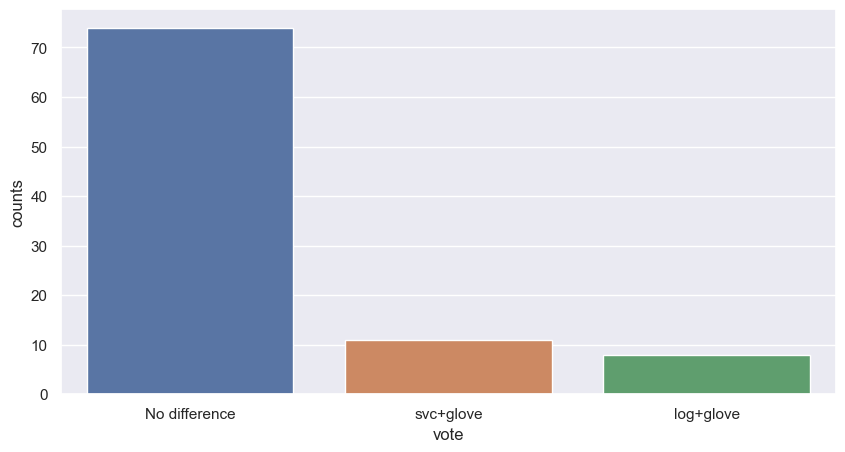

In [112]:
# Overall votes
sns.barplot(data = df_part4_votes, x = "vote", y = "counts")

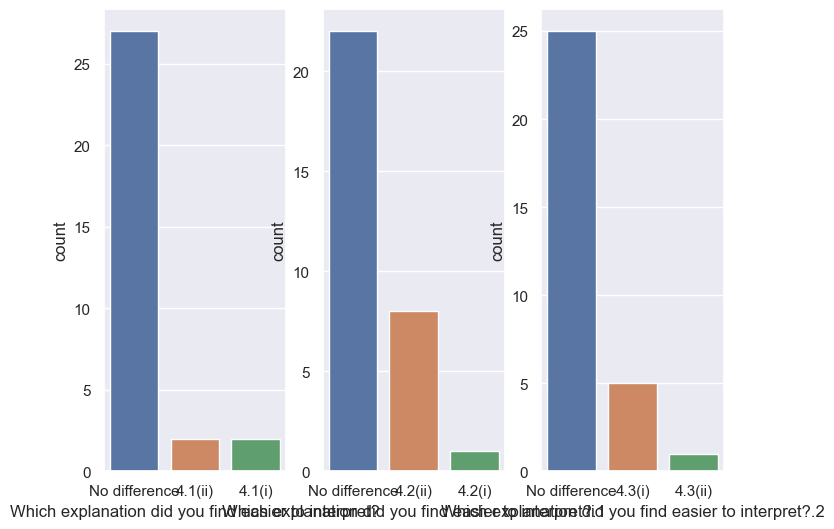

In [60]:
# Per question
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x = 'Which explanation did you find easier to interpret?', data = df_results, ax = ax[0])
sns.countplot(x = 'Which explanation did you find easier to interpret?.1', data = df_results, ax = ax[1])
sns.countplot(x = 'Which explanation did you find easier to interpret?.2', data = df_results, ax = ax[2])
plt.show()

### Part 5: Comparing between svc + tfidf vs svc + glove

#### Total no. of votes across the questions

1st model: 9 + 5 + 4 = 29

2nd model: 5 + 10 + 10 = 30

No difference: 6 + 5 + 4 = 25

In [123]:
ls = []
for col in df_results.columns[43:46]:
    ls.append(df_results[col])

In [124]:
part5_votes = pd.concat(ls)
part5_votes.unique()

array(['5.1(ii)', '5.1(i)', 'No difference', '5.2(ii)', '5.2(i)',
       '5.3(ii)', '5.3(i)'], dtype=object)

In [125]:
part5_votes = part5_votes.replace({
    "5.1(i)" : "log+glove",
    "5.1(ii)" : "svc+glove",
    "5.2(i)" : "log+glove",
    "5.2(ii)" : "svc+glove",
    "5.3(i)" : "log+glove",
    "5.3(ii)" : "svc+glove"
    })

In [126]:
df_part5_votes = part5_votes.value_counts().rename_axis('vote').reset_index(name='counts')

<AxesSubplot:xlabel='vote', ylabel='counts'>

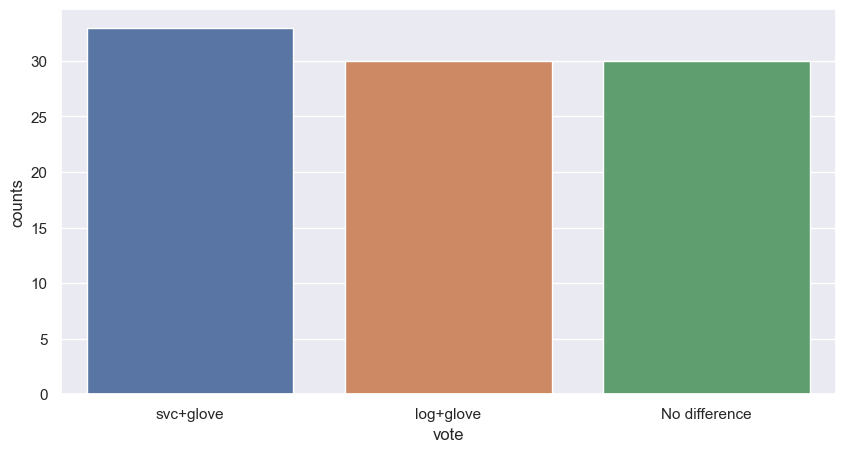

In [127]:
# Overall votes
sns.barplot(data = df_part5_votes, x = "vote", y = "counts")

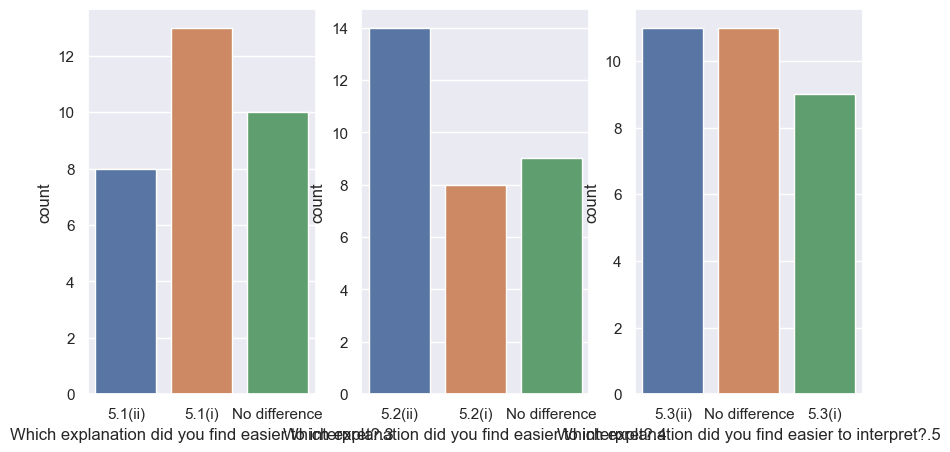

In [62]:
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x = 'Which explanation did you find easier to interpret?.3', data = df_results, ax = ax[0])
sns.countplot(x = 'Which explanation did you find easier to interpret?.4', data = df_results, ax = ax[1])
sns.countplot(x = 'Which explanation did you find easier to interpret?.5', data = df_results, ax = ax[2])
plt.show()

### Part 3: Looking at whether the metrics of understanding increased over the questions 

In [64]:
# Part 3: Assessing understandability of log + tfidf
print(df_results.columns[25:40])

Index(['Do you understand why the model made the prediction?',
       'Why do you think the model made this prediction? ',
       'Did you find the visualisation easy to interpret?',
       'Do you understand why the model made the prediction?.1',
       'Why do you think the model made this prediction? .1',
       'Did you find the visualisation easy to interpret?.1',
       'Based on your current understanding, do you think that the sentence below would be predicted to be "Identifier_Cookie_or_Similar_Tech_1stParty"?\n\n"We also use tracking technologies to keep records, store your preferences, improve our advertising, and collect Non-Identifying Information, including Device Data and information about your interaction with the Site and our Business Partners' web sites."',
       'Do you understand why the model made the prediction?.2',
       'Why do you think the model made this prediction?',
       'Did you find the visualisation easy to interpret?.2',
       'Based on your curren

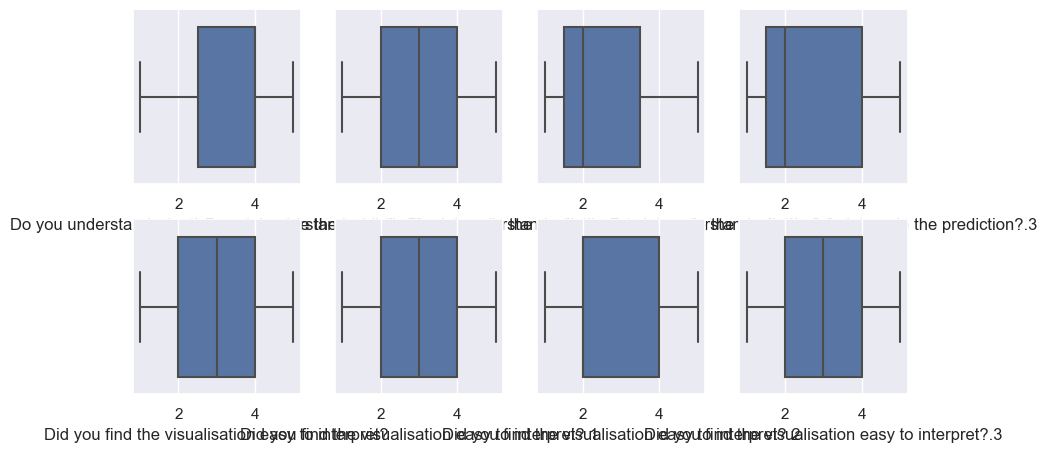

In [65]:
fig, ax = plt.subplots(2, 4)
sns.set(rc={'figure.figsize':(18,10)})

sns.boxplot(x = "Do you understand why the model made the prediction?", data = df_results, ax = ax[0, 0])
sns.boxplot(x = "Do you understand why the model made the prediction?.1", data = df_results, ax = ax[0, 1])
sns.boxplot(x = "Do you understand why the model made the prediction?.2", data = df_results, ax = ax[0, 2])
sns.boxplot(x = "Do you understand why the model made the prediction?.3", data = df_results, ax = ax[0, 3])

sns.boxplot(x = "Did you find the visualisation easy to interpret?", data = df_results, ax = ax[1, 0])
sns.boxplot(x = "Did you find the visualisation easy to interpret?.1", data = df_results, ax = ax[1, 1])
sns.boxplot(x = "Did you find the visualisation easy to interpret?.2", data = df_results, ax = ax[1, 2])
sns.boxplot(x = "Did you find the visualisation easy to interpret?.3", data = df_results, ax = ax[1, 3])
plt.show()

In [66]:
# Take the average of each question and compare since distributions aren't very meaningful
part3_understand = []
part3_interpret = []

part3_understand.append(df_results["Do you understand why the model made the prediction?"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.1"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.2"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.3"].mean())

part3_interpret.append(df_results["Did you find the visualisation easy to interpret?"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.1"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.2"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.3"].mean())

In [67]:
df_part3 = pd.DataFrame(
    data = {
        "question_no" : [n for n in range(1, 5)],
        "understand" : part3_understand,
        "interpret" : part3_interpret
    }
)

df_part3.head()

,question_no,understand,interpret
0,1,3.322581,3.032258
1,2,2.967742,2.870968
2,3,2.548387,2.612903
3,4,2.483871,2.806452


In [68]:
df_part3 = pd.melt(df_part3, id_vars = ["question_no"], value_vars = ["understand", "interpret"], value_name="score", var_name = "metric")

df_part3.head()

,question_no,metric,score
0,1,understand,3.322581
1,2,understand,2.967742
2,3,understand,2.548387
3,4,understand,2.483871
4,1,interpret,3.032258


<AxesSubplot:xlabel='question_no', ylabel='score'>

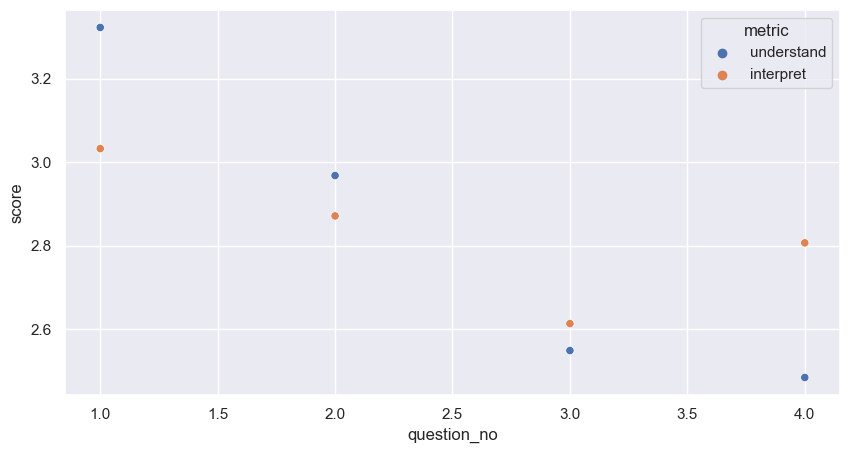

In [69]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x = "question_no", y = "score", data = df_part3, hue = "metric")

#### Looking at whether counterfactuals were correctly predicted

In [70]:
df_counterfactuals = df_results.iloc[:, [31, 35, 39]]

<AxesSubplot:xlabel='Based on your current understanding, do you think that the sentence below would be predicted to be "Identifier_Cookie_or_Similar_Tech_1stParty"?\n\n"We also use tracking technologies to keep records, store your preferences, improve our advertising, and collect Non-Identifying Information, including Device Data and information about your interaction with the Site and our Business Partners\' web sites."', ylabel='count'>

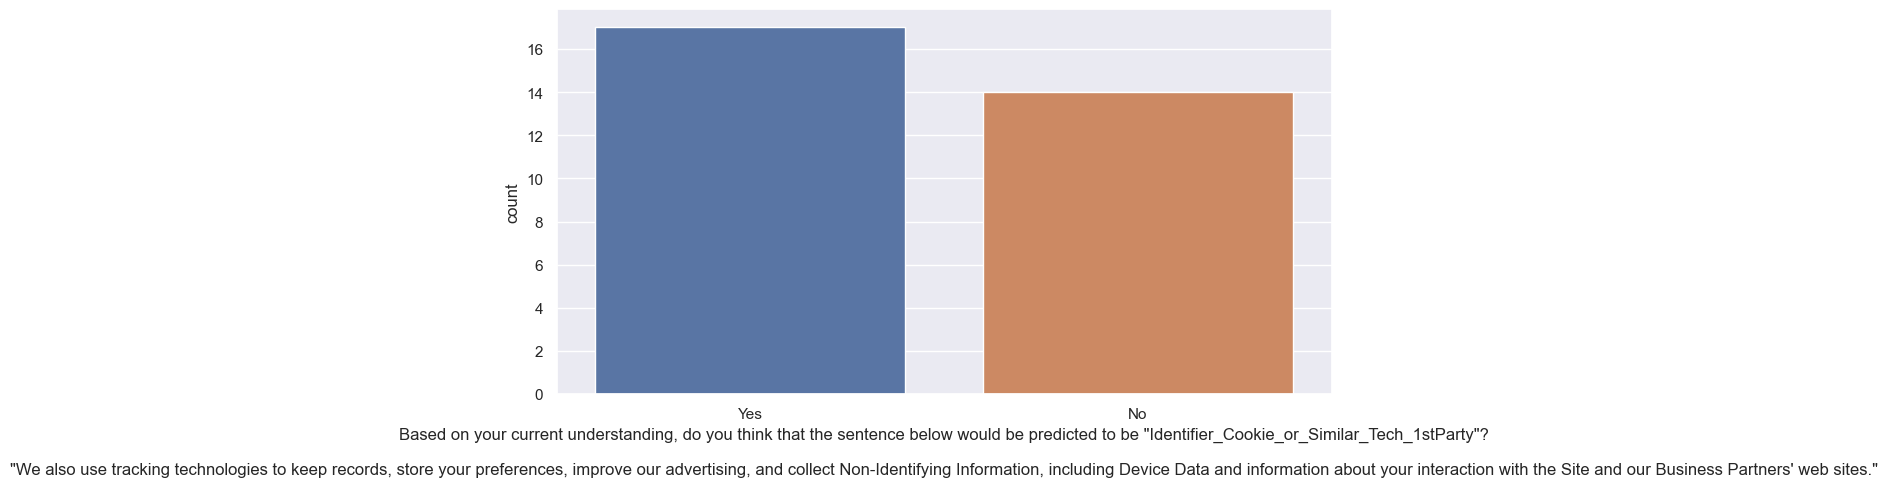

In [71]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x = df_counterfactuals.iloc[: ,0])

<AxesSubplot:xlabel='Based on your current understanding, do you think the sentence below would be predicted to be in "Identifier_Cookie_or_Similar_Tech_1stParty?"\n\n"As explained above, you may either volunteer to us certain information (such as your phone number), or we may automatically collect certain information, such as through the use of your mobile device system\'s permissions, or through the use of cookies or similar tracking technologies."', ylabel='count'>

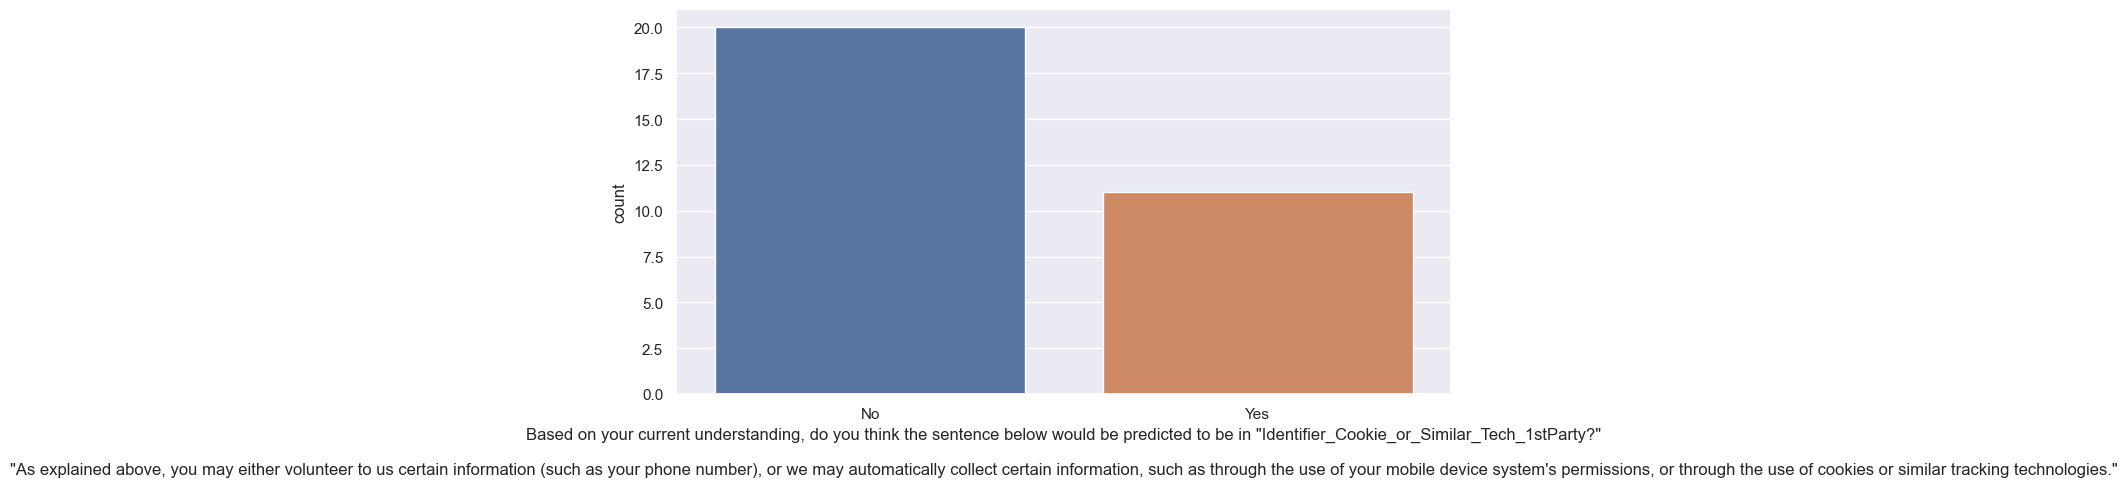

In [72]:
sns.countplot(x = df_counterfactuals.iloc[: ,1])

<AxesSubplot:xlabel='Based on your current understanding, do you think the sentence below would be predicted to be in "Identifier_Cookie_or_Similar_Tech_1stParty?"\n\n"These cookies and other such tracking technologies allow the collection of data, such as your device\'s model, operating system and screen size, the other applications installed on your device, and information about how you use our services."', ylabel='count'>

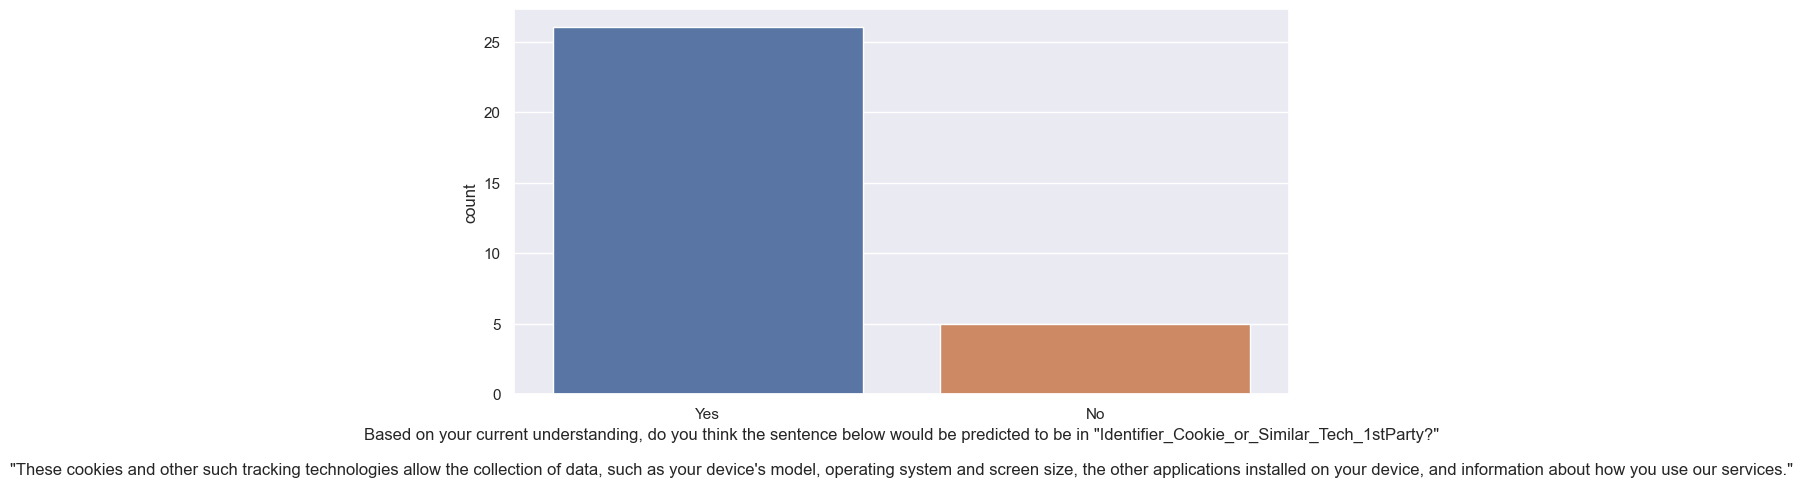

In [73]:
sns.countplot(x = df_counterfactuals.iloc[: ,2])